In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets,neighbors,decomposition, tree
import time
from sklearn.metrics import plot_confusion_matrix


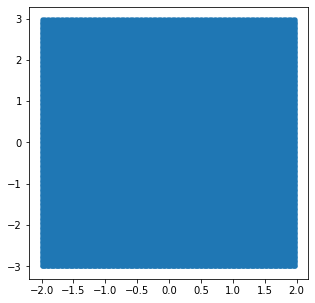

In [27]:
#Criando um MeshGrid
h = .02  # tamanho do MESH

x_min,x_max = -2,2
y_min,y_max = -3,3

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



plt.figure(figsize=(5,5))
plt.scatter(xx, yy,marker='.')
plt.show()

Extraindo 2 componentes das 150 amostras
Mantida 97.77% da informação do conjunto inicial de dados
KNN executado em 0.001066


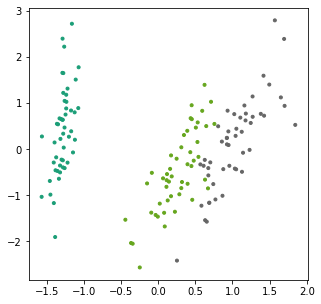

In [28]:
#Carrega dataset
iris = datasets.load_iris()

#seleciona dois componentes principais
n_components = 2
print( "Extraindo %d componentes das %d amostras" % (n_components, len(iris.target)) )

pca = decomposition.PCA(n_components=n_components, whiten=True, svd_solver='randomized')
pca = pca.fit(iris.data)

X = pca.transform(iris.data)
print('Mantida %5.2f%% da informação do conjunto inicial de dados'%(sum(pca.explained_variance_ratio_)*100))

t0=time.time()
knn = neighbors.KNeighborsClassifier(5)
predicao = knn.fit(X,iris.target)
t_exec = time.time()-t0

print( "KNN executado em %f" % (t_exec) )

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=iris.target,marker='.',cmap='Dark2')
plt.show()


<Figure size 720x720 with 0 Axes>

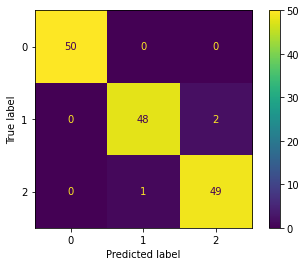

In [31]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(knn, X, iris.target,include_values=True) 
plt.show()

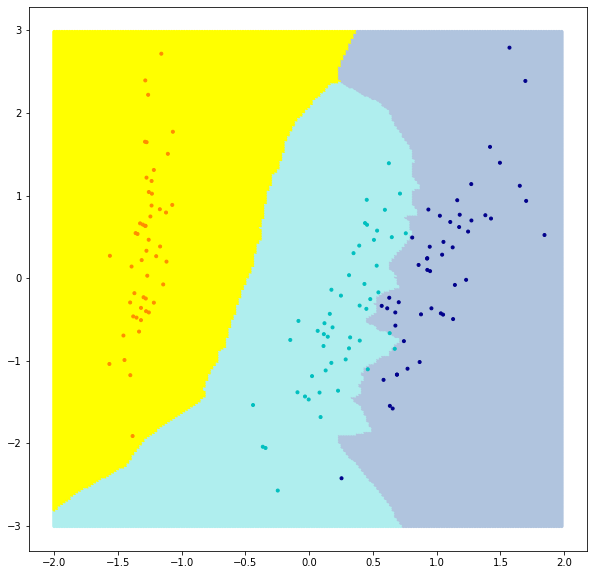

In [ ]:
#Vamos colorir
zz = knn.predict(np.c_[xx.ravel(),yy.ravel()])

cmap_light = ListedColormap(['yellow', 'paleturquoise', 'lightsteelblue'])
cmap_dark = ListedColormap(['darkorange', 'c', 'darkblue'])
plt.figure(figsize=(10,10))
plt.scatter(xx, yy,c=zz,marker='.',cmap=cmap_light)
plt.scatter(X[:,0], X[:,1], c=iris.target,marker='.',cmap=cmap_dark)
plt.show()



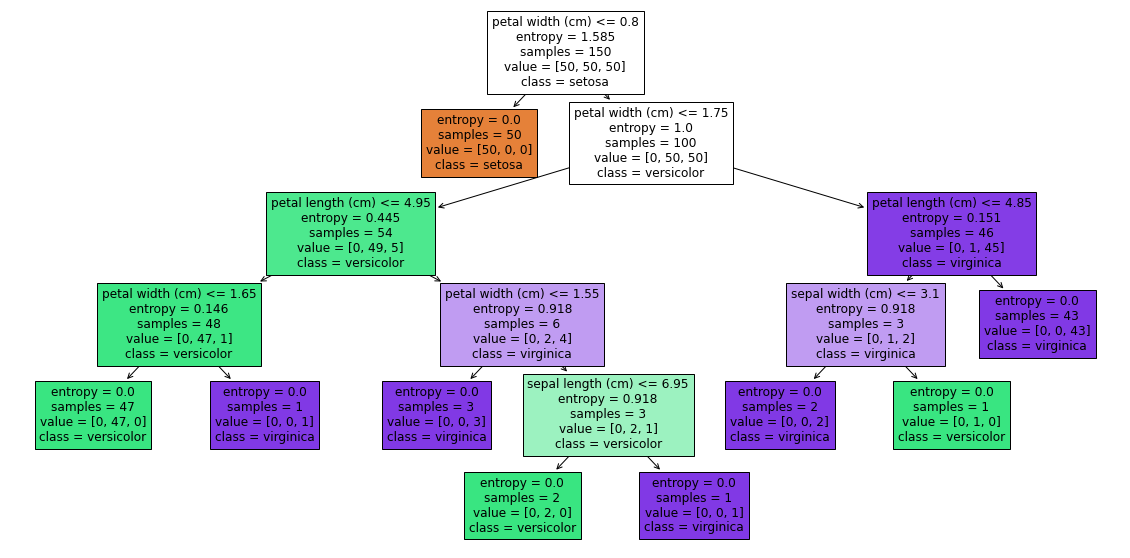

In [ ]:
arvore = tree.DecisionTreeClassifier(criterion='entropy')
arvore = arvore.fit(iris.data,iris.target)

plt.figure(figsize=(20,10))
tree.plot_tree(arvore,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()

In [ ]:
amostra = [[1.9 , 3 , 3.4 ,.9]]

class_amostra = arvore.predict(amostra)
print(iris.target_names[class_amostra])

['versicolor']


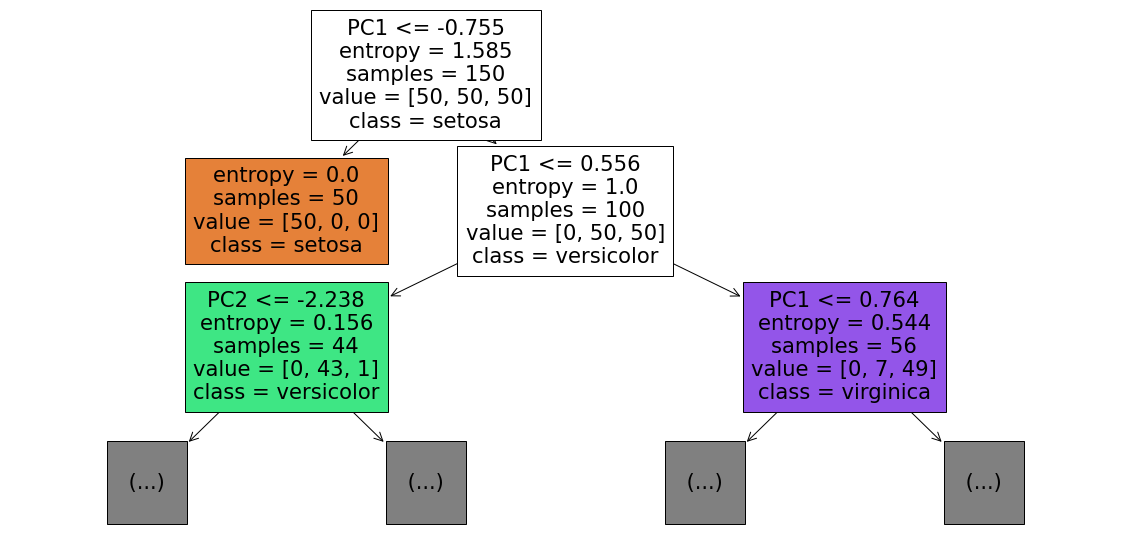

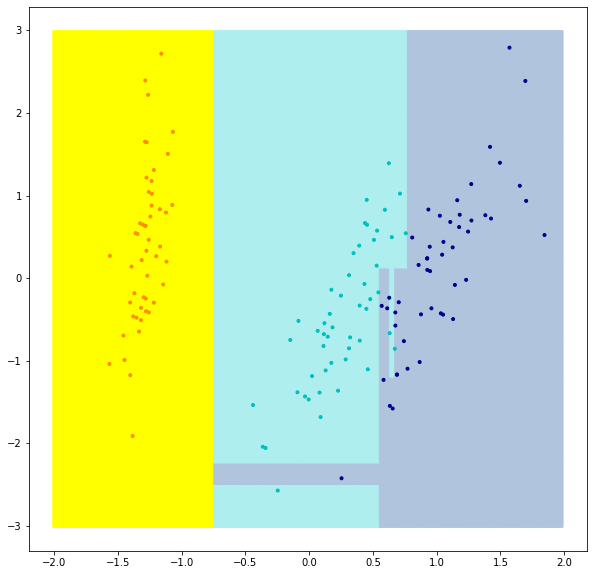

In [ ]:
arvorePCA = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
arvorePCA = arvore.fit(X,iris.target)

plt.figure(figsize=(20,10))
tree.plot_tree(arvore,feature_names=['PC1', 'PC2'],class_names=iris.target_names,filled=True,max_depth=2)
plt.show()


zz = arvore.predict(np.c_[xx.ravel(),yy.ravel()])

cmap_light = ListedColormap(['yellow', 'paleturquoise', 'lightsteelblue'])
cmap_dark = ListedColormap(['darkorange', 'c', 'darkblue'])
plt.figure(figsize=(10,10))
plt.scatter(xx, yy,c=zz,marker='.',cmap=cmap_light)
plt.scatter(X[:,0], X[:,1], c=iris.target,marker='.',cmap=cmap_dark)
plt.show()